In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir("../input/digit-recognizer"))

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from torchsummary import summary

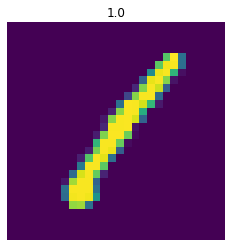

In [3]:
# load data
train = pd.read_csv(r"../input/digit-recognizer/train.csv", dtype=np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255

# train test split
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size=0.2,
                                                                             random_state=42)

# create feature and targets tensor for train set
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)  # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

# batch size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[0].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[0]))
plt.savefig('graph.png')
plt.show()

In [4]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
    
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        
        # BatchNormalization 1 
        self.batch1 = nn.BatchNorm2d(32)
        self.relu2 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout
        self.drop1 = nn.Dropout(p=0.25)
        
        # Convolution 3
        self.cnn3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0)
        
        # Convolution 4 - BatchNormalization 2
        self.cnn4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.batch2 = nn.BatchNorm2d(64)
        self.relu3 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Dropout 2
        self.drop2 = nn.Dropout(p=0.25)
        
        
        # Fully connected 1
        self.fc1 = nn.Linear(64 * 3 * 3, 256)
        self.batch3 = nn.BatchNorm1d(256)
        self.relu4 = nn.ReLU()
        
        # Fully connected 2
        self.fc2 = nn.Linear(256, 128)
        self.batch4 = nn.BatchNorm1d(128)
        self.relu5 = nn.ReLU()
        
        # Fully connected 3
        self.fc3 = nn.Linear(128,84)
        self.batch5 = nn.BatchNorm1d(84)
        self.relu6 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.25)
        
        # Fully connected 4
        self.fc4 = nn.Linear(84, 10)
        
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        
        # BatchNormalization 1
        out = self.batch1(out)
        out = self.relu2(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Dropout
        out = self.drop1(out)

        # Convolution 3
        out = self.cnn3(out)
        
        # Convolution 4 - BatchNormalization 2
        out = self.cnn4(out)
        out = self.batch2(out)
        out = self.relu3(out)
        
        # Max pool 2
        out = self.maxpool2(out)
        
        # Dropout 2
        out = self.drop2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        
        out = self.fc1(out)
        out = self.batch3(out)
        out = self.relu4(out)
        
        out = self.fc2(out)
        out = self.batch4(out)
        out = self.relu5(out)
        
        out = self.fc3(out)
        out = self.batch5(out)
        out = self.relu6(out)
        
        # Linear function (readout)
        out = self.fc4(out)
        

        
        return out
    


In [5]:
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)
num_epochs = 50


train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)


model = CNNModel()

error = nn.CrossEntropyLoss()

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 24, 24]             416
              ReLU-2           [-1, 16, 24, 24]               0
            Conv2d-3           [-1, 32, 20, 20]          12,832
       BatchNorm2d-4           [-1, 32, 20, 20]              64
              ReLU-5           [-1, 32, 20, 20]               0
         MaxPool2d-6           [-1, 32, 10, 10]               0
           Dropout-7           [-1, 32, 10, 10]               0
            Conv2d-8             [-1, 64, 8, 8]          18,496
            Conv2d-9             [-1, 64, 6, 6]          36,928
      BatchNorm2d-10             [-1, 64, 6, 6]             128
             ReLU-11             [-1, 64, 6, 6]               0
        MaxPool2d-12             [-1, 64, 3, 3]               0
          Dropout-13             [-1, 64, 3, 3]               0
           Linear-14                  [

/Users/hongjin-u/opt/anaconda3/envs/Pytorch/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459064158/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [102]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.062164172530174255  Accuracy: 97.47618865966797 %
Iteration: 1000  Loss: 0.05731787160038948  Accuracy: 98.44047546386719 %
Iteration: 1500  Loss: 0.007407953031361103  Accuracy: 98.52381134033203 %
Iteration: 2000  Loss: 0.021668460220098495  Accuracy: 98.42857360839844 %
Iteration: 2500  Loss: 0.08942211419343948  Accuracy: 98.58333587646484 %
Iteration: 3000  Loss: 0.004172531422227621  Accuracy: 98.66666412353516 %
Iteration: 3500  Loss: 0.041095126420259476  Accuracy: 98.76190185546875 %
Iteration: 4000  Loss: 0.01143832877278328  Accuracy: 98.83333587646484 %
Iteration: 4500  Loss: 0.00893883965909481  Accuracy: 98.89286041259766 %
Iteration: 5000  Loss: 0.04528636485338211  Accuracy: 98.98809814453125 %
Iteration: 5500  Loss: 0.0053772227838635445  Accuracy: 98.91666412353516 %
Iteration: 6000  Loss: 0.029183099046349525  Accuracy: 98.88095092773438 %
Iteration: 6500  Loss: 0.008047240786254406  Accuracy: 99.05952453613281 %
Iteration: 7000  Loss: 0.00235

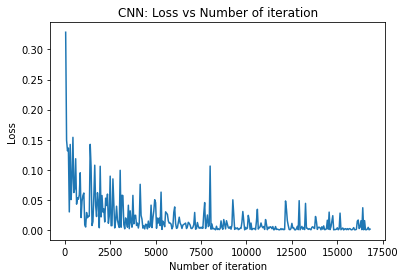

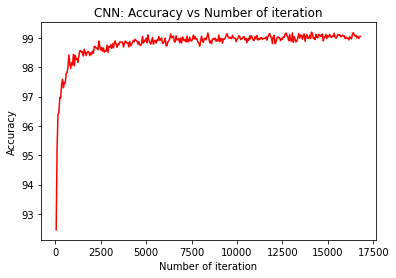

In [103]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [104]:
#save model
print('save model state dict keys: \n', model.state_dict().keys())
torch.save(model.state_dict(), 'checkpoint.pth')

save model state dict keys: 
 odict_keys(['cnn1.weight', 'cnn1.bias', 'cnn2.weight', 'cnn2.bias', 'batch1.weight', 'batch1.bias', 'batch1.running_mean', 'batch1.running_var', 'batch1.num_batches_tracked', 'cnn3.weight', 'cnn3.bias', 'cnn4.weight', 'cnn4.bias', 'batch2.weight', 'batch2.bias', 'batch2.running_mean', 'batch2.running_var', 'batch2.num_batches_tracked', 'fc1.weight', 'fc1.bias', 'batch3.weight', 'batch3.bias', 'batch3.running_mean', 'batch3.running_var', 'batch3.num_batches_tracked', 'fc2.weight', 'fc2.bias', 'batch4.weight', 'batch4.bias', 'batch4.running_mean', 'batch4.running_var', 'batch4.num_batches_tracked', 'fc3.weight', 'fc3.bias', 'batch5.weight', 'batch5.bias', 'batch5.running_mean', 'batch5.running_var', 'batch5.num_batches_tracked', 'fc4.weight', 'fc4.bias'])


In [105]:
# load model
state_dict = torch.load('checkpoint.pth')
print('load model state dict keys: \n', model.state_dict().keys())

load model state dict keys: 
 odict_keys(['cnn1.weight', 'cnn1.bias', 'cnn2.weight', 'cnn2.bias', 'batch1.weight', 'batch1.bias', 'batch1.running_mean', 'batch1.running_var', 'batch1.num_batches_tracked', 'cnn3.weight', 'cnn3.bias', 'cnn4.weight', 'cnn4.bias', 'batch2.weight', 'batch2.bias', 'batch2.running_mean', 'batch2.running_var', 'batch2.num_batches_tracked', 'fc1.weight', 'fc1.bias', 'batch3.weight', 'batch3.bias', 'batch3.running_mean', 'batch3.running_var', 'batch3.num_batches_tracked', 'fc2.weight', 'fc2.bias', 'batch4.weight', 'batch4.bias', 'batch4.running_mean', 'batch4.running_var', 'batch4.num_batches_tracked', 'fc3.weight', 'fc3.bias', 'batch5.weight', 'batch5.bias', 'batch5.running_mean', 'batch5.running_var', 'batch5.num_batches_tracked', 'fc4.weight', 'fc4.bias'])


In [106]:
# load test data
new_test = pd.read_csv('../input/digit-recognizer/test.csv').values
new_images = torch.from_numpy(new_test).type(torch.FloatTensor)/255
print(new_images.shape)
new_test_loader = DataLoader(new_images, batch_size=batch_size, shuffle=False)

torch.Size([28000, 784])


In [107]:
results = []
with torch.no_grad():
    model.eval()
    for images in new_test_loader:
        images = Variable(images.view(batch_size,1,28,28))
        outputs = model(images)
        predict = torch.max(outputs.data, 1)[1]
        results += predict.numpy().tolist()
        
print(results[:10])
print(len(results))

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3]
28000


In [108]:
results = np.array(results).flatten()
print(results[:10])
print(results.shape)

[2 0 9 9 3 7 0 3 0 3]
(28000,)


In [109]:
submission = pd.DataFrame({'ImageId': list(range(1, len(results)+1)),
                          'Label': results})
submission.to_csv('submission.csv',index=False, header=True)
print(submission[:10])

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3
